# Check Figure 8 of Loisel+2023

In [1]:
# imports
from importlib import reload
from importlib.resources import files
import os
import numpy as np

from scipy.optimize import curve_fit

import pandas
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting as oc_plotting
from ocpy.satellites import pace as sat_pace

from bing.models import anw as boring_anw
from bing.models import bbnw as boring_bbnw
from bing.models import utils as model_utils
from bing.models import functions
from bing import inference as big_inf
from bing import rt as big_rt
from bing import chisq_fit


In [2]:
%matplotlib ipympl

# Load up Loisel+2023 Hydrolight dataset

## Using the full run (inelastic scattering) at Zenith

In [3]:
ds = loisel23.load_ds(4,0)

In [20]:
l23_wave = ds.Lambda.data
l23_Rrs = ds.Rrs.data
all_a = ds.a.data
all_b = ds.b.data
all_bnw = ds.bnw.data
all_bbnw = ds.bbnw.data
all_bb = ds.bb.data
all_adg = ds.ag.data + ds.ad.data
all_ad = ds.ad.data
all_ag = ds.ag.data
all_aph = ds.aph.data
all_anw = ds.anw.data
#
all_bw = all_b - all_bnw
all_bbw = all_bb - all_bbnw
#
all_bbd = ds.bbd.data
all_bbph = ds.bbph.data

In [5]:
aw = all_a[0] - all_anw[0]

In [6]:
all_anw.shape

(3320, 81)

# Setup

In [7]:
i440 = np.argmin(np.abs(l23_wave-440.))

# $b_{\rm w}/b$ histogram at 440nm

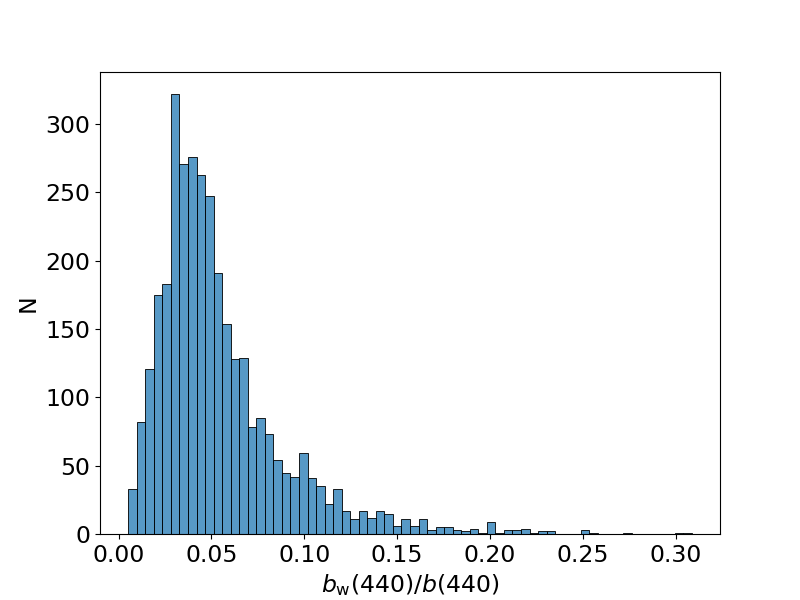

In [13]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

sns.histplot(all_bw[:,i440]/all_b[:,i440])#, log_scale=(True,False))
#
ax.set_xlabel(r'$b_{\rm w}(440)/b(440)$')
ax.set_ylabel('N')
oc_plotting.set_fontsize(ax, 17.)
#
#ax.set_xscale('log')
plt.show()

# Now backscattering $b_b$

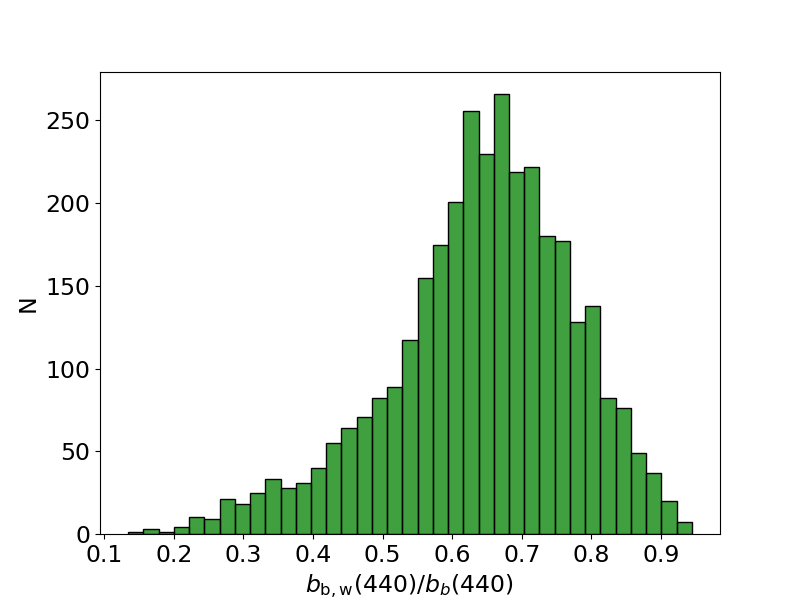

In [17]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

sns.histplot(all_bbw[:,i440]/all_bb[:,i440], color='green')#, log_scale=(True,False))
#
ax.set_xlabel(r'$b_{\rm b,w}(440)/b_b(440)$')
ax.set_ylabel('N')
oc_plotting.set_fontsize(ax, 17.)
#
#ax.set_xscale('log')
plt.show()

----

# While we are at it, peak at the componentns of $b_b$

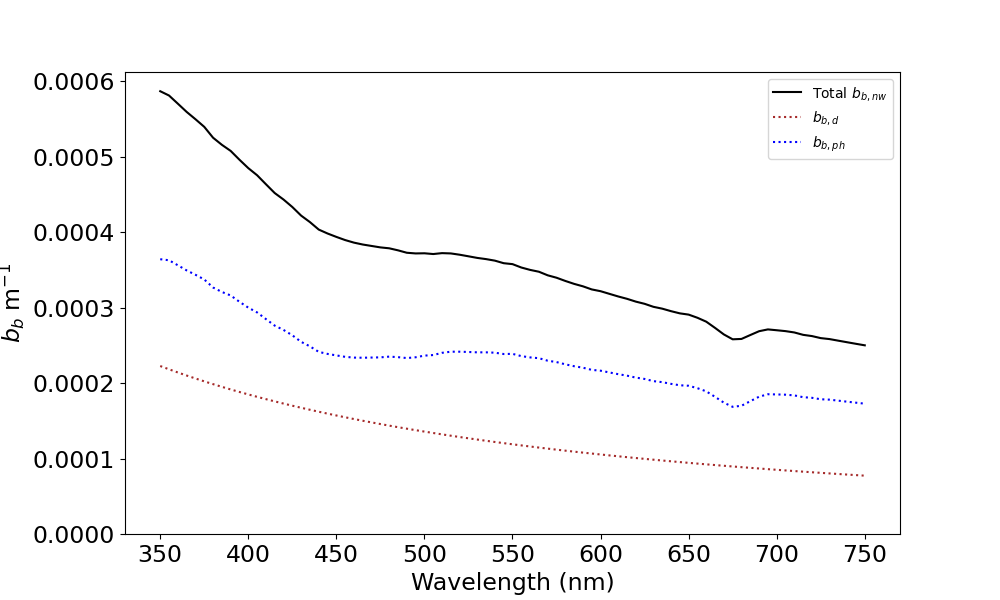

In [27]:
idx = 170

fig = plt.figure(figsize=(10,6))
ax = plt.gca()

ax.plot(l23_wave, all_bbnw[idx], 'k', label=r'Total $b_{b,nw}$')
ax.plot(l23_wave, all_bbd[idx], ':', color='brown', label=r'$b_{b,d}$')
ax.plot(l23_wave, all_bbph[idx], ':', color='blue', label=r'$b_{b,ph}$')
#
ax.legend()

ax.set_ylabel(r'$b_b \; \rm m^{-1}$')
ax.set_xlabel('Wavelength (nm)')
oc_plotting.set_fontsize(ax, 17.)

ax.set_ylim(0., None)

plt.show()